In [24]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy.oauth2 as oauth2
import pickle
import sqlite3 
conn = sqlite3.connect('hiphop.db')
cur = conn.cursor()

In [25]:
market = [ "AD", "AR", "AT", "AU", "BE", "BG", "BO", "BR", "CA", "CH", "CL", "CO", "CR", "CY", 
      "CZ", "DE", "DK", "DO", "EC", "EE", "ES", "FI", "FR", "GB", "GR", "GT", "HK", "HN", "HU", 
      "ID", "IE", "IS", "IT", "JP", "LI", "LT", "LU", "LV", "MC", "MT", "MX", "MY", "NI", "NL", 
      "NO", "NZ", "PA", "PE", "PH", "PL", "PT", "PY", "SE", "SG", "SK", "SV", "TH", "TR", "TW", 
      "US", "UY", "VN" ]
CLIENT_ID ='d93af13f2f6343c4b7d9e81ba8f29663' 
CLIENT_SECRET = '96842fd0fdc74a739bd6d82c176b090b'

credentials = oauth2.SpotifyClientCredentials(
        client_id=CLIENT_ID,
        client_secret=CLIENT_SECRET)

token = credentials.get_access_token()
sp = spotipy.Spotify(auth=token)

In [26]:
response=requests.get('http://www.popvortex.com/music/charts/top-rap-songs.php')
soup=bs(response.content,'html.parser')
titles=soup.findAll('cite',{'class':'title'})
artists=soup.findAll('em',{'class':'artist'})
art,tit=[],[]
for t,a in zip(titles,artists):
    art.append(a.text)
    tit.append(t.text)
dic={'artist':art,'title':tit}

In [32]:
df=pd.DataFrame(dic)
df['artist'][19]='Juice WRLD'
df['artist'][21]='Russ'
df['artist'][23]='True Damage'
df['artist'][4]='Post Malone'
df['artist'][27]='Quality Control'
df['artist'][70]='Tyga'
df['artist'][75]='Cardi B'
df['artist'][76]='Mustard'
df['artist'][81]='Macklemore'
df['artist'][83]='Moneybagg Yo'
df['artist'][35]='Lil Nas X'
df['title'][42]='Restroom Occupied'
df['artist'][44]='Iggy Azalea'
df['title'][55]='Easy'
df['artist'][56]='Fat Joe'
df['artist'][58]='Upchurch'
df['title'][12]='Money In The Grave'
df['title'][13]='Ballin’'
df['title'][23]=df['title'][23][:6]
df['title'][25]=df['title'][23][:10]
df['title'][77]='Stainless'
df['title'][80]='Use This Gospel'
df['title'][81]='Cant Hold Us'
df['title'][82]='Till I Collapse'
df['title'][85]='Ballin’'
df['title'][86]='California Love'
df['title'][92]='Love the Way You Lie'
df['title'][99]='Gangstas Paradise'
df['title'][56]='YES'
df['title'][34]='Hollywoods Bleeding'
df['artist'][63]='Lil Peep'
df['title'][31]='223s'

In [33]:
info=[]
artistss=[]
for a,t in zip(df.artist,df.title):
    p=sp.search(q='artist:' + a.lower() + ' track:' + t.lower(), type='track')
    a=sp.search(q='artist:'+ a.lower(),type='artist')
    try:
        info.append(p['tracks']['items'][0])
    except:
        info.append('NAN') 
    try:
        artistss.append(a['artists']['items'][0]['id'])
    except:
        artistss.append('NAN')
        

In [34]:
uris=[]
for i in range(0,100):
    try:
        uris.append(info[i]['uri'])
    except:
        uris.append(info[i])

In [35]:
df['uris']=uris

In [36]:
df=df[df['uris']!='NAN']

In [90]:
cur.execute("""CREATE TABLE songs (
                                    songId TEXT PRIMARY KEY,
                                    song TEXT,
                                    artistId TEXT,
                                    artist TEST
                                    );
            """)

In [91]:
df.head()

,artist,title,uris,artistID
0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,246dkjvS1zLTtiykXe5h60
1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,246dkjvS1zLTtiykXe5h60
2,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,4r63FhuTkUYltbVAg5TQnk
3,Arizona Zervas,ROXANNE,spotify:track:696DnlkuDOXcMAnKlTgXXK,0vRvGUQVUjytro0xpb26bs
5,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,6fOMl44jA4Sp5b9PpYCkzz


In [92]:
cur.execute("""INSERT INTO songs (songId, song, artistId, artist)
                VALUES('{}','{}','{}','{}');
                """.format(df.uris,df.title,df.artistID,df.artist))

In [94]:
cur.execute("""SELECT * FROM songs;""")
dfr=pd.DataFrame(cur.fetchall())
df.columns=[x[0] for x in cur.description]
dfr
#hmmmmm

,0,1,2,3
0,0 spotify:track:21jGcNKet2qwijlDFuPiPb\n1 ...,0 ...,0 246dkjvS1zLTtiykXe5h60\n1 246dkjvS1z...,0 Post Malone\n1 ...


In [38]:
artistss=[]
for ar in df.artist:
    a=sp.search(q='artist:'+ ar.lower(),type='artist')
    try:
        artistss.append(a['artists']['items'][0]['id'])
    except:
        artistss.append('NAN')

In [40]:
df['artistID']=artistss

In [41]:
df=df[df['artistID']!='NAN']

In [62]:
bars=[] #a count of beats, bar offsets indicate downbeats (first beat of measure)
beats=[] #Basic time unit for a piece of music, each tick of a metronome
tatums=[] #smaller than a beat, smallest pulse you can hear in music
#lowest regular pulse train that a listener intuitvely infers from the timing 
#of a persevied musical event
sections=[] #accumulations of bars and measures and stuff
#large variations in rhythm of tamber
#ex. chorus, verse, bridge, guitar solo
segments=[] #segment of time defined as a given number of beats
#a chunk of time that has generally same sound throughout
#very small pieces of time
#characterized by their perceptual onsets, duration, loudness, pitch, timbre and content
for u in df.uris:
    aa=sp.audio_analysis(u)
    bars.append(aa['bars'])
    beats.append(aa['beats'])
    tatums.append(aa['tatums'])
    sections.append(aa['sections'])
    segments.append(aa['segments'])
sp.audio_analysis(df.uris[0]).keys()

dict_keys(['meta', 'track', 'bars', 'beats', 'tatums', 'sections', 'segments'])

In [69]:
a['bars']

[{'start': 0.569, 'duration': 0.5171, 'confidence': 0.909},
 {'start': 1.0861, 'duration': 2.00964, 'confidence': 0.718},
 {'start': 3.09574, 'duration': 1.99377, 'confidence': 0.3},
 {'start': 5.08951, 'duration': 1.99012, 'confidence': 0.094},
 {'start': 7.07963, 'duration': 2.00646, 'confidence': 0.402},
 {'start': 9.08609, 'duration': 1.99856, 'confidence': 0.098},
 {'start': 11.08465, 'duration': 1.99423, 'confidence': 0.489},
 {'start': 13.07888, 'duration': 1.99599, 'confidence': 0.613},
 {'start': 15.07487, 'duration': 1.98497, 'confidence': 0.403},
 {'start': 17.05984, 'duration': 1.98953, 'confidence': 0.647},
 {'start': 19.04936, 'duration': 1.99877, 'confidence': 0.09},
 {'start': 21.04814, 'duration': 2.00159, 'confidence': 0.746},
 {'start': 23.04973, 'duration': 1.99948, 'confidence': 0.501},
 {'start': 25.04921, 'duration': 1.99706, 'confidence': 0.63},
 {'start': 27.04627, 'duration': 2.00185, 'confidence': 0.11},
 {'start': 29.04812, 'duration': 2.00036, 'confidence':

In [89]:
sp.artist_top_tracks(df.artistID[0])['tracks'][6]['album']['name']

"Hollywood's Bleeding"

In [75]:
sp.artist_related_artists(artistss[0])['artists'][0]['name']

'Rae Sremmurd'

In [14]:
dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration=[],[],[],[],[],[],[],[],[],[],[],[]
time=[]
for u in df.uris:
    feats=sp.audio_features(u)[0]
    dance.append(feats['danceability'])
    energy.append(feats['energy'])
    key.append(feats['key'])
    loudness.append(feats['loudness'])
    mode.append(feats['mode'])
    speechiness.append(feats['speechiness'])
    acousticness.append(feats['acousticness'])
    instrumentalness.append(feats['instrumentalness'])
    liveness.append(feats['liveness'])
    valence.append(feats['valence'])
    tempo.append(feats['tempo'])
    duration.append(feats['duration_ms'])
    time.append(feats['time_signature'])

In [15]:
df['dance']=dance
df['energy']=energy
df['key']=key
df['loudness']=loudness
df['mode']=mode
df['speechiness']=speechiness
df['acousticness']=acousticness
df['instrumentalness']=instrumentalness
df['liveness']=liveness
df['valence']=valence
df['tempo']=tempo
df['duration']=duration
df['ts']=time

In [16]:
df.reset_index(inplace=True)
df.rename(columns={'index':'rank'},inplace=True)
with open('df.pickle', 'wb') as f:
    pickle.dump(df, f)

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [18]:
df.sort_values(['rank'])

,rank,artist,title,uris,dance,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,ts
0,0,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4
1,1,Post Malone,Take What You Want (feat. Ozzy Osbourne & Trav...,spotify:track:7CZyCXKG6d5ALeq41sLzbw,0.499,0.800,1,-2.665,0,0.0502,0.090600,0.000000,0.1470,0.272,139.919,229573,4
2,2,DaBaby,BOP,spotify:track:6Ozh9Ok6h4Oi1wUSLtBseN,0.769,0.787,11,-3.909,1,0.3670,0.189000,0.000000,0.1290,0.836,126.770,159715,4
3,3,Post Malone & Swae Lee,Sunflower (Spider-Man: Into the Spider-Verse),spotify:track:3KkXRkHbMCARz0aVfEt68P,0.760,0.479,2,-5.574,1,0.0466,0.556000,0.000000,0.0703,0.913,89.911,158040,4
4,5,NF,Time,spotify:track:6MxMqCgqmekcr0VwSU7AVH,0.677,0.688,0,-4.058,0,0.0633,0.138000,0.000000,0.1140,0.198,98.049,240429,4
5,6,Kanye West,Follow God,spotify:track:2QpGZOhTCHHiKmpSO9FW4h,0.529,0.900,1,-3.503,1,0.4180,0.000248,0.000012,0.0426,0.434,180.291,104591,4
6,7,Post Malone,Goodbyes (feat. Young Thug),spotify:track:0t3ZvGKlmYmVsDzBJAXK8C,0.548,0.653,5,-3.875,1,0.0810,0.456000,0.000000,0.1030,0.163,150.068,174853,4
7,8,Tyga,Ayy Macarena,spotify:track:6LcauUZjF1eXQrgqMUecHX,0.816,0.630,2,-5.568,1,0.2260,0.133000,0.000000,0.0692,0.715,96.493,131607,4
8,10,Post Malone,Circles,spotify:track:21jGcNKet2qwijlDFuPiPb,0.695,0.762,0,-3.497,1,0.0395,0.192000,0.002440,0.0863,0.553,120.042,215280,4
9,11,Lil Baby,Woah,spotify:track:598yNsG1JFrGd4n2kMoz7F,0.882,0.602,11,-5.554,1,0.2450,0.017700,0.000000,0.1780,0.430,142.959,183011,4


In [19]:
df.duration=df.duration/60000

In [20]:
cols=list(df.columns[4:])
cols.append('rank')

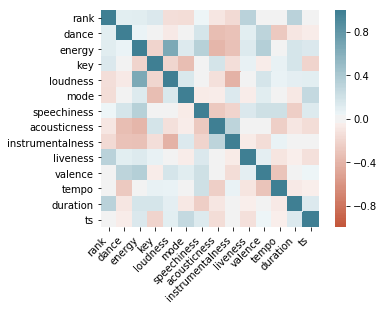

In [21]:
corr = df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

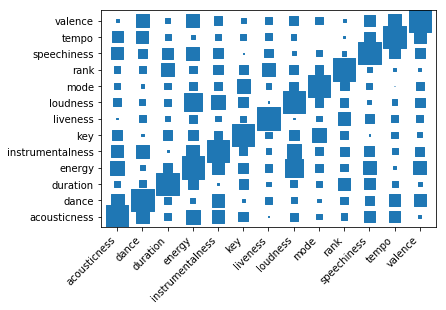

In [18]:
def heatmap(x, y, size):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)
    
# data = pd.read_csv('https://raw.githubusercontent.com/drazenz/heatmap/master/autos.clean.csv')
columns = cols
corr = df[columns].corr()
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
corr.columns = ['x', 'y', 'value']
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs()
)